# Basic Food Recommender Model

## Background

Indonesia memiliki cita-cita besar untuk menjadi negara maju. Oleh karena itu, peningkatan kualitas Sumber Daya Manusia (SDM) menjadi pilar penting yang harus diperbaiki, terutama dalam hal peningkatan kesehatan, pemenuhan gizi, dan pencegahan stunting (Kemenko PMK RI, 2024). Pemerintah Indonesia telah merencanakan untuk melaksanakan program makan bergizi gratis sesuai arahan Presiden RI Prabowo Subianto. Pemerintah berharap program tersebut dapat menurunkan jumlah kasus stunting bahkan mencegah kasus stunting baru di masa depan. Fokus awal dari program ini adalah anak-anak sekolah dan kelompok rentan lainnya. Anak sekolah yang dimaksud antara lain pelajar PAUD, SD, SMP, dan SMA (detik.com, 2024). 

Anak sekolah menjadi sasaran karena status gizi dan  stunting sangat mempengaruhi kecerdasan anak. Status gizi memberikan kontribusi terhadap kesulitan belajar sebesar 32,83%. Anak yang kekurangan nutrisi cenderung memiliki kelemahan pada sistem saraf hingga dapat menyebabkan kelainan motorik dan kognitif (Dewi, dkk, 2021). Sebagai calon penerus bangsa, maka pertumbuhan dan perkembangan anak sekolah perlu diperhatikan dengan baik agar menghasilkan potensi sumber daya manusia dengan kualitas maksimal. Hal ini dapat dicapai dengan salah satu cara yaitu pemenuhan kebutuhan nutrisi harian melalui program makanan bergizi gratis.

Angka Kecukupan Gizi (AKG) menurut Kementerian Kesehatan Republik Indonesia adalah kecukupan rata-rata gizi harian yang dianjurkan untuk sekelompok orang setiap harinya. Kebutuhan gizi ideal anak yang harus terpenuhi dalam sehari terbagi menjadi dua kelompok, yaitu zat gizi makro dan mikro. Zat gizi makro adalah semua jenis zat gizi yang dibutuhkan anak dalam jumlah banyak, seperti energi (kalori), protein, lemak, dan karbohidrat. Sementara zat gizi mikro adalah nutrisi yang dibutuhkan dalam jumlah sedikit, seperti vitamin dan mineral (Damar Upahita, 2021). Penentuan nilai gizi disesuaikan dengan jenis kelamin, kelompok umur, tinggi badan, berat badan, serta aktivitas fisik (Kemenkes RI, 2019).

Seluruh program makanan bergizi gratis harus melibatkan kolaborasi pemangku kepentingan terkait untuk dikonvergensikan sehingga bisa komprehensif dan terintegrasi. Salah satunya adalah penyediaan makanan yang efektif dan efisien. Salah satu perusahaan penyedia layanan catering dan bento, Olagizi ingin mengambil peran penting dalam penyediaan paket makanan bergizi bagi siswa SMP dan SMA. Olagizi ingin memberikan layanan dengan optimal. Oleh karena itu, Olagizi ingin membuat sebuah sistem yang dapat memberikan rekomendasi tentang makanan bergizi yang dipersonalisasi sesuai kebutuhan gizi dan selera para siswa. Di sisi lain, Olagizi juga ingin rekomendasi tersebut memberikan pilihan makanan yang dapat dimasak dalam waktu yang tidak terlalu lama agar makanan dapat disiapkan tepat pada waktu, khususnya makanan untuk sesi sarapan. Untuk pengembangan tahap awal, Olagizi ingin membuat model sistem rekomendasi makanan berdasarkan kemiripan bahan baku dan jumlah kalori yang terkandung serta berdasarkan hasil ulasan rating makanan.

## Business Understanding

### Problem Statements

1. Bagaimana sistem rekomendasi dapat memberikan pilihan makanan dengan bahan baku dan kandungan jumlah kalori yang mirip?

2. Bagaimana sistem rekomendasi dapat memberikan berbagai pilihan makanan yang mungkin disukai oleh target pelanggan?

### Goals

1. Menghasilkan 10 rekomendasi makanan yang memiliki bahan baku dan nilai kalori yang mirip serta dapat dimasak dalam waktu kurang dari 2 jam.

2. Menghasilkan 10 rekomendasi makanan yang mungkin disukai oleh target pelanggan dan dapat dimasak dalam waktu kurang dari 2 jam.

### Solution Statements

1. Menerapkan pendekatan _content-based filtering_ menggunakan algoritma _cosine similarity_ untuk menghitung kemiripan bahan baku yang digunakan kemudian diurutkan berdasarkan jumlah kalori yang paling mendekati.

2. Menerapkan pendekatan _collaborative filtering_ menggunakan algoritma _deep learning_ untuk menemukan pola pemberian rating oleh user.

## Data Understanding

#### Overview

Dataset ini berasal dari platform Kaggle salah satu pengembang sistem rekomendasi makanan diet dengan nama akun @SOUMEDHIK yang dapat diakses pada link di bawah. Ukuran dataset begitu besar sehingga dataset yang digunakan hanya sebagian sampel saja. Pada proyek ini, hanya akan menggunakan 2 file dataset dalam format csv, yaitu recipes data dan interactions data.

_Download raw dataset_:
[Diet Recommender Dataset](https://www.kaggle.com/code/soumedhik/diet-recommender/input)

##### recipes_sample_df

| No | Kolom | Tipe Data | Deskripsi |
|----|-------|-----------|-----------|
| 1 | Name | `object` | Nama resep. |
| 2 | id | `integer` | ID resep. |
| 3 | minutes | `integer` | Waktu yang diperlukan untuk memasak (dalam menit). |
| 4 | contribution_id | `integer` | ID pengguna yang berkontribusi mengunggah resep. |
| 5 | submitted | `object` | Tanggal resep diunggah. |
| 6 | tags | `object` | Kategori atau tag resep. |
| 7 | nutrition | `object`| Informasi nutrisi (kalori, lemak/Total Fat (g), gula (g), sodium (mg), protein (g), lemak jenuh/saturated fat (g), dan karbohidrat (g)). |
| 8 | n_steps | `integer` | Jumlah langkah yang diperlukan untuk memasak. |
| 9 | description | `object` | Deskripsi singkat mengenai resep. |
| 10 | ingredients | `object` | Daftar bahan-bahan yang digunakan dalam resep. |
| 11 | n_ingredients | `integer` | Jumlah bahan yang digunakan dalam resep. |

##### interactions_sample_df

| No | Kolom | Tipe Data | Deskripsi |
|----|-------|-----------|-----------|
| 1 | user_id | `integer` | ID pengguna yang memberikan ulasan. |
| 2 | recipe_id | `integer` | ID resep yang diberi ulasan. |
| 3 | date | `object` | Tanggal ulasan diberikan. |
| 4 | rating | `integer` | Penilaian yang diberikan (dalam skala tertentu). |
| 5 | review | `object` | Isi ulasan yang diberikan pengguna. |

### Import Libraries

Import seluruh library yang diperlukan:

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Flatten, Dot, Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

### Load Data

Muat semua dataset yang akan digunakan:

In [216]:
# Data 1
recipes_sample_data = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Food%20Recommender/raw-dataset/recipes_sample.csv"
recipes_sample_df = pd.read_csv(recipes_sample_data)

# Data 2
interactions_sample_data = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Food%20Recommender/raw-dataset/interactions_sample.csv"
interactions_sample_df = pd.read_csv(interactions_sample_data)

### Explore Data

#### Explore recipes_sample_df

In [217]:
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2316 non-null   object
 1   id              2316 non-null   int64 
 2   minutes         2316 non-null   int64 
 3   contributor_id  2316 non-null   int64 
 4   submitted       2316 non-null   object
 5   tags            2316 non-null   object
 6   nutrition       2316 non-null   object
 7   n_steps         2316 non-null   int64 
 8   steps           2316 non-null   object
 9   description     2264 non-null   object
 10  ingredients     2316 non-null   object
 11  n_ingredients   2316 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 217.2+ KB


* Diketahui dataset memiliki 2 tipe data yaitu `object` dan `int64` dengan total baris sebanyak 2316 untuk hampir seluruh kolom kecuali kolom _description_ yang hanya memiliki 2264 baris data.
* Kolom _submitted_ seharusnya memiliki format data `datetime`.
* Kolom _nutrition_ seharusnya memiliki format data `float64`.

In [218]:
# Check duplicates
print(f"Duplicated data:", recipes_sample_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", recipes_sample_df.isna().sum())

Duplicated data: 0
Missing value: name               0
id                 0
minutes            0
contributor_id     0
submitted          0
tags               0
nutrition          0
n_steps            0
steps              0
description       52
ingredients        0
n_ingredients      0
dtype: int64


* Setelah dicek ternyata pada kolom _description_ terdapat __52__ __missing value__.

Menampilkan 5 data teratas:

In [219]:
recipes_sample_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,cheesy cauliflower soup crock pot slow cooker,318526,305,369715,2008-08-08,"['course', 'main-ingredient', 'preparation', '...","[411.2, 51.0, 28.0, 17.0, 27.0, 99.0, 5.0]",6,"['put cauliflower , onion , celery and chicken...","a favorite of mine. this is a great, low carb,...","['frozen cauliflower', 'onion', 'celery rib', ...",9
1,chicken enchiladas ii,7399,0,22015,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course...","[593.2, 46.0, 30.0, 37.0, 66.0, 74.0, 16.0]",10,['cover chicken with water and simmer for 30 m...,NaN,"['chicken breast halves', 'tomatoes', 'cream o...",9
2,simple spinach salad with lemon mint dressing,161266,10,11297,2006-03-23,"['15-minutes-or-less', 'time-to-make', 'course...","[42.3, 0.0, 13.0, 2.0, 6.0, 0.0, 2.0]",9,"['place spinach leaves on a platter', 'mix thr...",the title says it all :) makes a nice healt...,"['baby spinach leaves', 'alfalfa sprout', 'che...",9
3,fat free sugar free soft serve,233665,2,512320,2007-06-09,"['15-minutes-or-less', 'time-to-make', 'course...","[241.8, 2.0, 57.0, 63.0, 21.0, 3.0, 16.0]",1,['mix all the ingredients together with a whis...,for use in a soft serve maker,['fat-free sugar-free instant chocolate puddin...,4
4,u nega gei,306936,50,527886,2008-06-03,"['60-minutes-or-less', 'time-to-make', 'course...","[207.2, 3.0, 7.0, 44.0, 52.0, 3.0, 6.0]",8,"['place broth in a large saucepan', 'add green...",the iroquois confederacy included parts of wha...,"['chicken broth', 'green onion', 'cornmeal', '...",10


Menampilkan statistik deskriptif:

In [220]:
recipes_sample_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,2316,2316,cheesy cauliflower soup crock pot slow cooker,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,2316.0,NaN,NaN,NaN,217649.354059,138741.225067,118.0,97184.5,205436.0,325888.0,536383.0
minutes,2316.0,NaN,NaN,NaN,130.925734,1557.553886,0.0,20.0,37.0,65.0,69120.0
contributor_id,2316.0,NaN,NaN,NaN,6090797.379965,105328791.647271,1533.0,55432.5,171084.0,386145.5,2001389261.0
submitted,2316,1526,2008-03-25,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,2316,2292,"['60-minutes-or-less', 'time-to-make', 'prepar...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition,2316,2316,"[411.2, 51.0, 28.0, 17.0, 27.0, 99.0, 5.0]",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_steps,2316.0,NaN,NaN,NaN,9.625216,6.010024,1.0,6.0,8.0,12.0,57.0
steps,2316,2316,"['put cauliflower , onion , celery and chicken...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,2264,2261,weber's real grilling,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Terdapat hal menarik di mana pada kolom _minutes_ memiliki nilai maksimum 69120. Artinya, seseorang membutuhkan waktu hingga 1152 jam atau 48 hari untuk memasak makanan tersebut. 

Cek distribusi dan outlier data numerik menggunakan histogram dan boxplot:

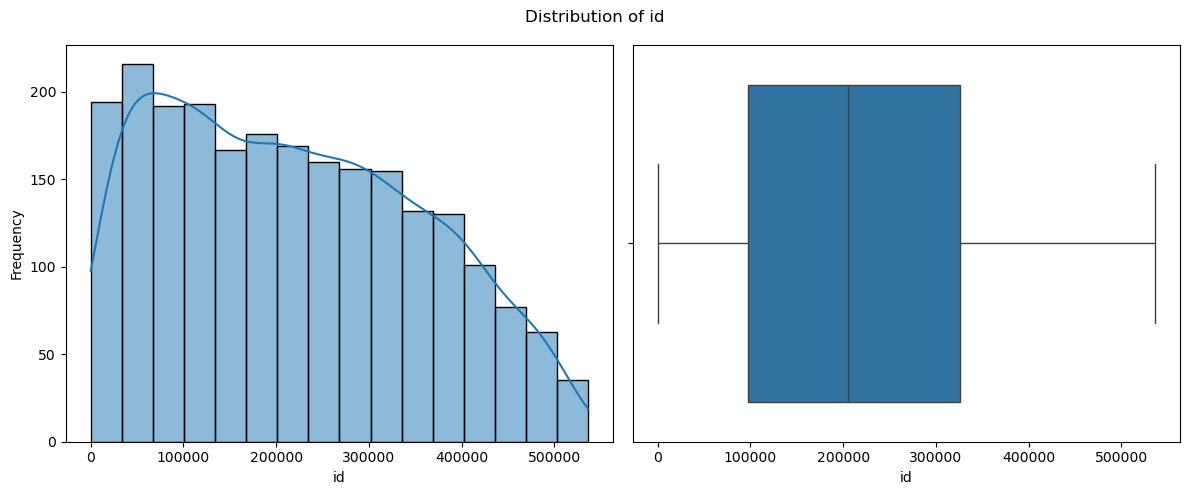

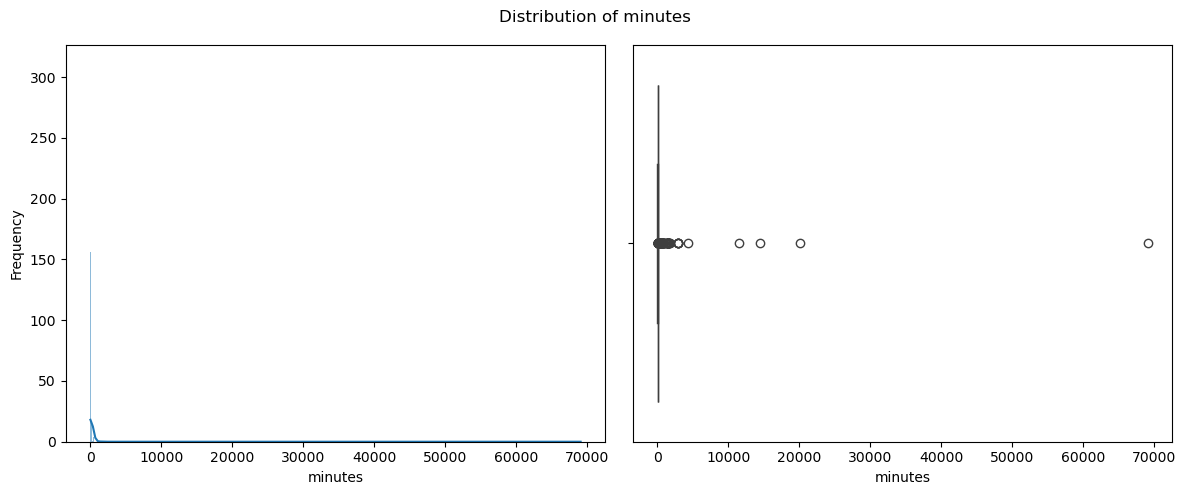

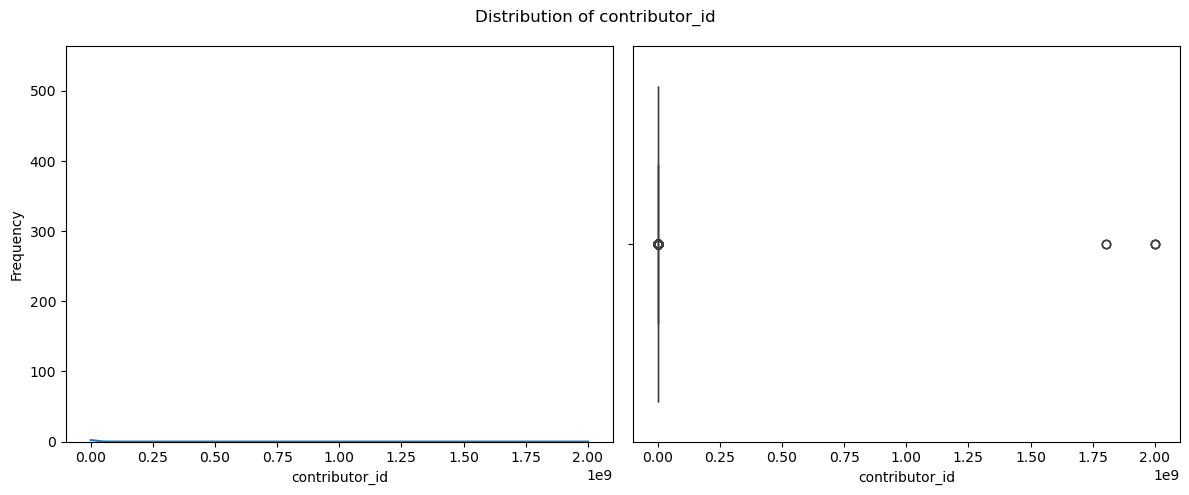

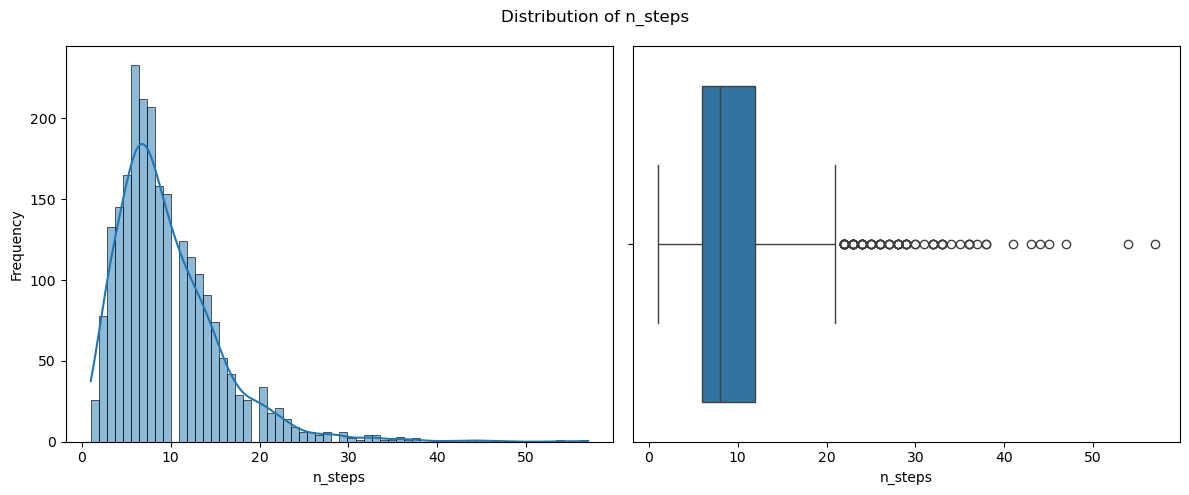

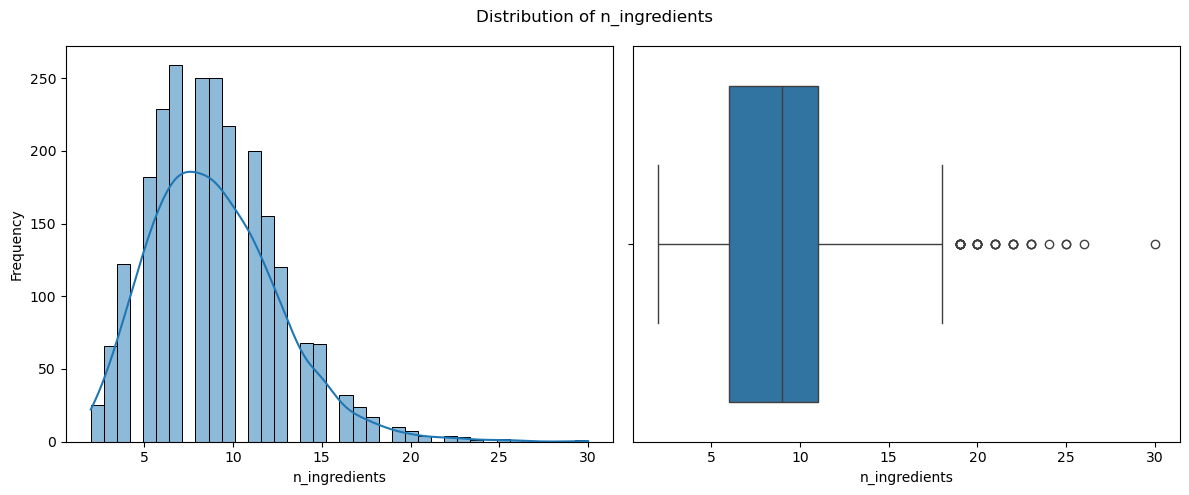

In [221]:
for col in recipes_sample_df.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribution of {col}")

    # Histogram
    sns.histplot(recipes_sample_df[col], kde=True, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    # Box PLot
    sns.boxplot(x=recipes_sample_df[col], ax=axes[1])

    plt.tight_layout()
    plt.show()

* Diketahui kolom _minutes_ memiliki outlier yang nilainya sangat besar dibandingkan nilai rata-rata.

#### Explore interactions_sample_df

In [222]:
interactions_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11324 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    11324 non-null  int64 
 1   recipe_id  11324 non-null  int64 
 2   date       11324 non-null  object
 3   rating     11324 non-null  int64 
 4   review     11323 non-null  object
dtypes: int64(3), object(2)
memory usage: 442.5+ KB


* Diketahui dataset memiliki 2 tipe data yaitu `object` dan `int64` dengan total baris sebanyak 11324 untuk hampir seluruh kolom kecuali kolom _review_ yang hanya memiliki 11323 baris data.
* Kolom _date_ seharusnya memiliki format data `datetime`.

In [223]:
# Check duplicates
print(f"Duplicated data:", interactions_sample_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", interactions_sample_df.isna().sum())

Duplicated data: 0
Missing value: user_id      0
recipe_id    0
date         0
rating       0
review       1
dtype: int64


* Terdapat __1__ __missing value__ pada kolom _review_.

Menampilkan 5 data teratas:

In [224]:
interactions_sample_df.head()

,user_id,recipe_id,date,rating,review
0,167527,380365,2009-09-14,5,I was born and raised in AL...this is a favori...
1,184723,34335,2008-01-15,5,"If I could give this more stars, I would. We ..."
2,2001108724,491150,2018-02-16,5,I made these last night and they were delish! ...
3,135804,50367,2004-04-01,4,Wonderful flavor. Roasting really brings out ...
4,1048246,388076,2010-01-04,5,I wanted to try something different for the ho...


Menampilkan statistik deskriptif:

In [225]:
interactions_sample_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,11324.0,NaN,NaN,NaN,135714284.785588,497314543.229327,1533.0,137130.25,335614.0,804550.0,2002361699.0
recipe_id,11324.0,NaN,NaN,NaN,160390.387142,130555.805881,55.0,54960.0,118763.5,241566.75,536678.0
date,11324,4374,2008-01-02,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,11324.0,NaN,NaN,NaN,4.401095,1.277812,0.0,4.0,5.0,5.0,5.0
review,11323,11306,Excellent!,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Diketahui mayoritas user memberikan nilai 4-5.

Cek distribusi dan outlier data _rating_ menggunakan histogram dan boxplot:

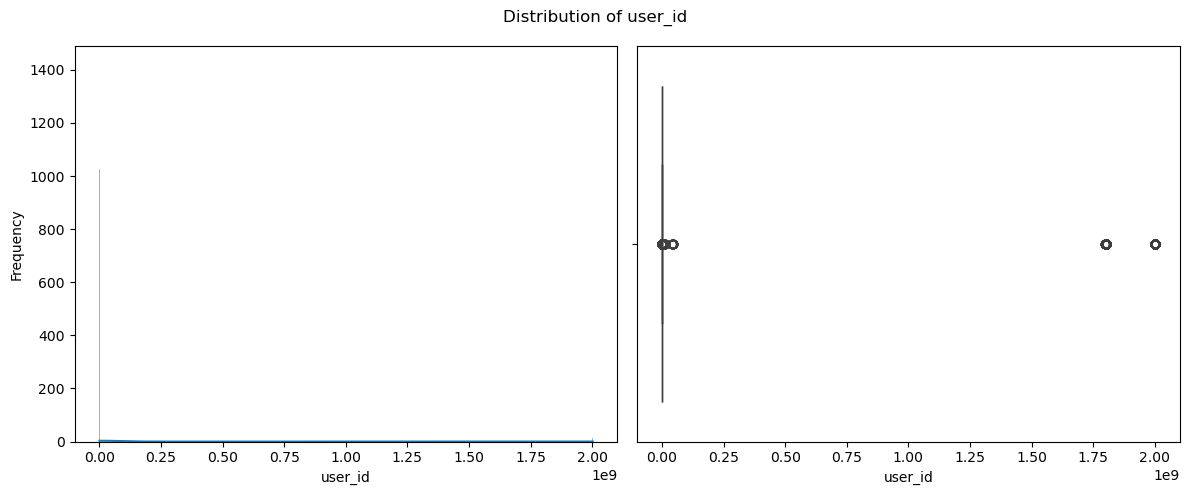

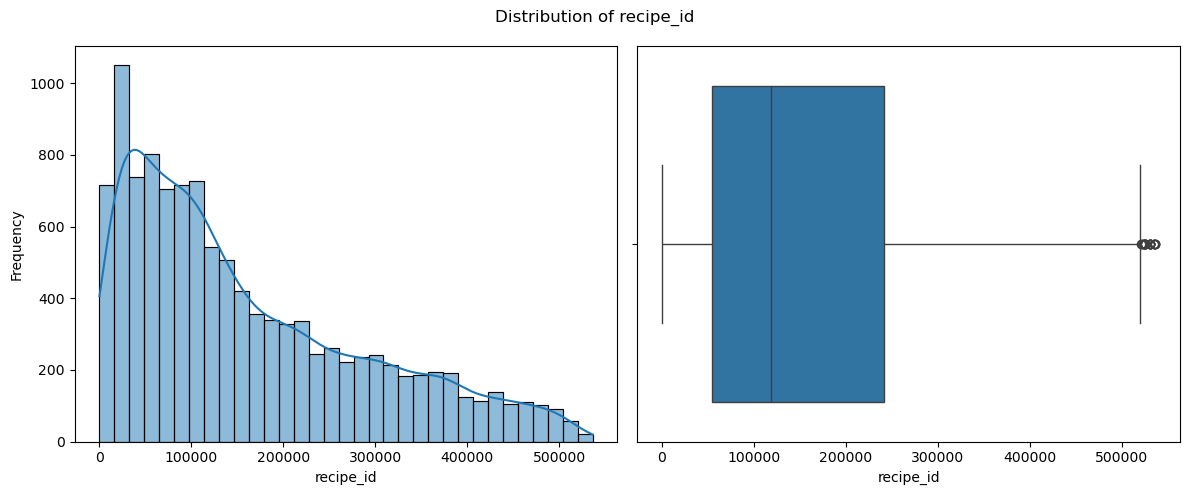

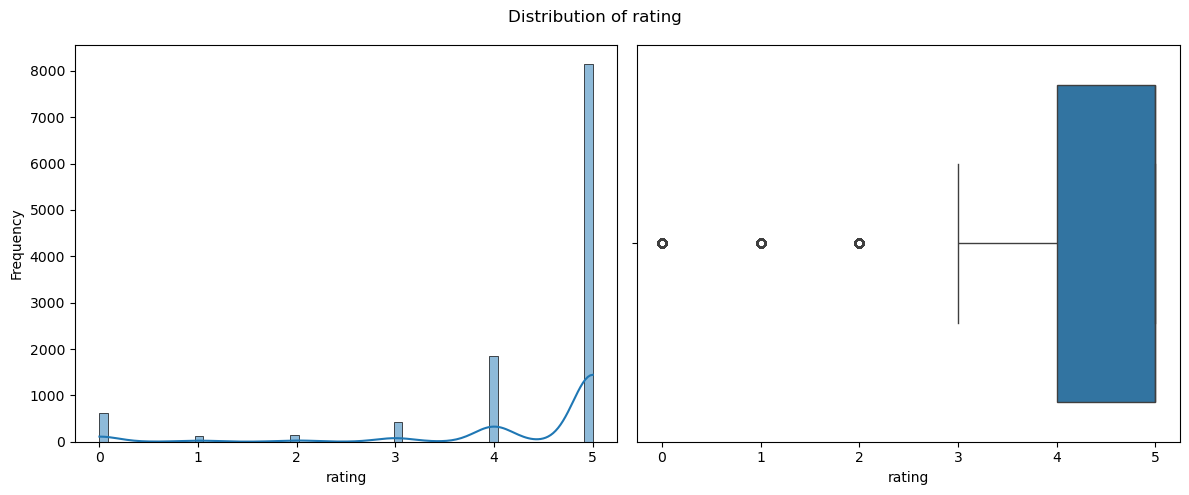

In [226]:
for col in interactions_sample_df.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribution of {col}")

    # Histogram
    sns.histplot(interactions_sample_df[col], kde=True, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    # Box PLot
    sns.boxplot(x=interactions_sample_df[col], ax=axes[1])

    plt.tight_layout()
    plt.show()

## Data Preparation

### Data Cleaning

#### Convert _Date_ to `datetime`

Kolom _submitted_ pada recipes_sample_df:

In [227]:
recipes_sample_df['submitted'] = pd.to_datetime(recipes_sample_df['submitted'])
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2316 non-null   object        
 1   id              2316 non-null   int64         
 2   minutes         2316 non-null   int64         
 3   contributor_id  2316 non-null   int64         
 4   submitted       2316 non-null   datetime64[ns]
 5   tags            2316 non-null   object        
 6   nutrition       2316 non-null   object        
 7   n_steps         2316 non-null   int64         
 8   steps           2316 non-null   object        
 9   description     2264 non-null   object        
 10  ingredients     2316 non-null   object        
 11  n_ingredients   2316 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 217.2+ KB


Kolom _date_ pada interactions_sample_df:

In [228]:
interactions_sample_df['date'] = pd.to_datetime(interactions_sample_df['date'])
interactions_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11324 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    11324 non-null  int64         
 1   recipe_id  11324 non-null  int64         
 2   date       11324 non-null  datetime64[ns]
 3   rating     11324 non-null  int64         
 4   review     11323 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 442.5+ KB


#### Remove Missing Value

Menghapus baris data yang memiliki missing value pada  `recipes_samplpe_df`:

In [229]:
recipes_sample_df = recipes_sample_df.dropna()

Recheck:

In [230]:
# Recheck missing value
print(f"Missing value:", recipes_sample_df.isna().sum().sum())

Missing value: 0


In [231]:
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2264 non-null   object        
 1   id              2264 non-null   int64         
 2   minutes         2264 non-null   int64         
 3   contributor_id  2264 non-null   int64         
 4   submitted       2264 non-null   datetime64[ns]
 5   tags            2264 non-null   object        
 6   nutrition       2264 non-null   object        
 7   n_steps         2264 non-null   int64         
 8   steps           2264 non-null   object        
 9   description     2264 non-null   object        
 10  ingredients     2264 non-null   object        
 11  n_ingredients   2264 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 229.9+ KB


Menghapus baris data yang memiliki missing value pada  `interaction_samplpe_df`:

In [232]:
interactions_sample_df = interactions_sample_df.dropna()

Recheck:

In [233]:
# Recheck missing value
print(f"Missing value:", interactions_sample_df.isna().sum().sum())

Missing value: 0


In [234]:
interactions_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11323 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    11323 non-null  int64         
 1   recipe_id  11323 non-null  int64         
 2   date       11323 non-null  datetime64[ns]
 3   rating     11323 non-null  int64         
 4   review     11323 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 530.8+ KB


#### Outlier Handling

Remove outlier dari data _minutes_ pada recipes_sample_df:

In [235]:
recipes_sample_df = recipes_sample_df[recipes_sample_df['minutes'] <= 1440]
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2239 non-null   object        
 1   id              2239 non-null   int64         
 2   minutes         2239 non-null   int64         
 3   contributor_id  2239 non-null   int64         
 4   submitted       2239 non-null   datetime64[ns]
 5   tags            2239 non-null   object        
 6   nutrition       2239 non-null   object        
 7   n_steps         2239 non-null   int64         
 8   steps           2239 non-null   object        
 9   description     2239 non-null   object        
 10  ingredients     2239 non-null   object        
 11  n_ingredients   2239 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 227.4+ KB


* Menghapus data resep makanan yang membutuhkan waktu lebih dari 24 jam atau 1440 menit untuk memasaknya.

### Filter Data

#### recipes_sample_df

Berdasarkan _goals_ yang telah ditetapkan, Olagizi ingin sistem memberikan rekomendasi makanan yang dapat dimasak kurang dari 2 jam. Oleh karena itu, data sebaiknya disaring terlebih dahulu.

In [236]:
recipes_sample_df = recipes_sample_df[recipes_sample_df['minutes'] < 120]
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2009 non-null   object        
 1   id              2009 non-null   int64         
 2   minutes         2009 non-null   int64         
 3   contributor_id  2009 non-null   int64         
 4   submitted       2009 non-null   datetime64[ns]
 5   tags            2009 non-null   object        
 6   nutrition       2009 non-null   object        
 7   n_steps         2009 non-null   int64         
 8   steps           2009 non-null   object        
 9   description     2009 non-null   object        
 10  ingredients     2009 non-null   object        
 11  n_ingredients   2009 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 204.0+ KB


### Features Enginering

#### Ekstrak data pada fitur _nutrition_ dalam `recipes_sample_df`:

1. Check data

In [237]:
recipes_sample_df['nutrition'].info()
recipes_sample_df['nutrition'].head()

<class 'pandas.core.series.Series'>
Index: 2009 entries, 2 to 2315
Series name: nutrition
Non-Null Count  Dtype 
--------------  ----- 
2009 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


2         [42.3, 0.0, 13.0, 2.0, 6.0, 0.0, 2.0]
3     [241.8, 2.0, 57.0, 63.0, 21.0, 3.0, 16.0]
4       [207.2, 3.0, 7.0, 44.0, 52.0, 3.0, 6.0]
5     [170.9, 16.0, 11.0, 12.0, 20.0, 9.0, 3.0]
6    [220.7, 8.0, 20.0, 12.0, 17.0, 17.0, 11.0]
Name: nutrition, dtype: object

Diketahui data pada kolom _nutrition_ memiliki format `object` yang berisi sebuah `list`. Data tersebut mengandung informasi jumlah kalori, lemak, gula, sodium, protein, lemak jenuh, dan karbohidrat.

2. Mengubah tipe data menjadi list:

In [238]:
recipes_sample_df['nutrition'] = recipes_sample_df['nutrition'].apply(lambda x: eval(x))

recipes_sample_df['nutrition'].info()

<class 'pandas.core.series.Series'>
Index: 2009 entries, 2 to 2315
Series name: nutrition
Non-Null Count  Dtype 
--------------  ----- 
2009 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


recheck tipe data:

In [239]:
recipes_sample_df['nutrition'].apply(type)

2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
5       <class 'list'>
6       <class 'list'>
             ...      
2311    <class 'list'>
2312    <class 'list'>
2313    <class 'list'>
2314    <class 'list'>
2315    <class 'list'>
Name: nutrition, Length: 2009, dtype: object

3. Memisahkan data _nutrition_ menjadi kolom tersendiri:

In [240]:
nutrition_columns = ["calories", "fat", "sugar", "sodium", "protein", "saturated fat", "carbohydrates"]

recipes_sample_df[nutrition_columns] = pd.DataFrame(recipes_sample_df['nutrition'].tolist(), index=recipes_sample_df.index, dtype="float64")
recipes_sample_df.drop(columns=['nutrition'], inplace=True)

recipes_sample_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,fat,sugar,sodium,protein,saturated fat,carbohydrates
2,simple spinach salad with lemon mint dressing,161266,10,11297,2006-03-23,"['15-minutes-or-less', 'time-to-make', 'course...",9,"['place spinach leaves on a platter', 'mix thr...",the title says it all :) makes a nice healt...,"['baby spinach leaves', 'alfalfa sprout', 'che...",9,42.3,0.0,13.0,2.0,6.0,0.0,2.0
3,fat free sugar free soft serve,233665,2,512320,2007-06-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all the ingredients together with a whis...,for use in a soft serve maker,['fat-free sugar-free instant chocolate puddin...,4,241.8,2.0,57.0,63.0,21.0,3.0,16.0
4,u nega gei,306936,50,527886,2008-06-03,"['60-minutes-or-less', 'time-to-make', 'course...",8,"['place broth in a large saucepan', 'add green...",the iroquois confederacy included parts of wha...,"['chicken broth', 'green onion', 'cornmeal', '...",10,207.2,3.0,7.0,44.0,52.0,3.0,6.0
5,bosnian vegetarian meatballs in yogurt sauce,134497,75,206722,2005-08-22,"['time-to-make', 'course', 'main-ingredient', ...",11,['saute the onions and garlic in oil until the...,an untried moosewood recipe posted for the zaa...,"['onions', 'garlic cloves', 'vegetable oil', '...",19,170.9,16.0,11.0,12.0,20.0,9.0,3.0
6,potato goat cheese gratin,334056,90,705876,2008-10-29,"['time-to-make', 'course', 'main-ingredient', ...",18,['preheat oven to 400f in nonstick skillet coo...,"usually not a big fan of goat cheese, but this...","['leeks', 'nonfat milk', 'all-purpose flour', ...",12,220.7,8.0,20.0,12.0,17.0,17.0,11.0


In [241]:
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2009 non-null   object        
 1   id              2009 non-null   int64         
 2   minutes         2009 non-null   int64         
 3   contributor_id  2009 non-null   int64         
 4   submitted       2009 non-null   datetime64[ns]
 5   tags            2009 non-null   object        
 6   n_steps         2009 non-null   int64         
 7   steps           2009 non-null   object        
 8   description     2009 non-null   object        
 9   ingredients     2009 non-null   object        
 10  n_ingredients   2009 non-null   int64         
 11  calories        2009 non-null   float64       
 12  fat             2009 non-null   float64       
 13  sugar           2009 non-null   float64       
 14  sodium          2009 non-null   float64       
 15  protein  

#### Gabung data *ingredients* pada `recipes_sample_df` menjadi string per resep:

In [242]:
recipes_sample_df['ingredients'] = ["".join(items) for items in recipes_sample_df['ingredients']]

In [243]:
recipes_sample_df['ingredients']

2       ['baby spinach leaves', 'alfalfa sprout', 'che...
3       ['fat-free sugar-free instant chocolate puddin...
4       ['chicken broth', 'green onion', 'cornmeal', '...
5       ['onions', 'garlic cloves', 'vegetable oil', '...
6       ['leeks', 'nonfat milk', 'all-purpose flour', ...
                              ...                        
2311    ['white sugar', 'light karo syrup', 'water', '...
2312    ['butter', 'eggs', 'milk', 'sugar', 'baking po...
2313    ['fish steaks', 'tomatoes', 'malt vinegar', 's...
2314    ['eggs', 'sugar', 'vegetable oil', 'cinnamon',...
2315    ['dry breadcrumbs', 'fresh cilantro', 'parmesa...
Name: ingredients, Length: 2009, dtype: object

In [244]:
recipes_sample_df['ingredients'] = [str(ingredients).strip("[]").replace(",", "") for ingredients in recipes_sample_df['ingredients']]

print(recipes_sample_df['ingredients'])


2       'baby spinach leaves' 'alfalfa sprout' 'cherry...
3       'fat-free sugar-free instant chocolate pudding...
4       'chicken broth' 'green onion' 'cornmeal' 'hadd...
5       'onions' 'garlic cloves' 'vegetable oil' 'carr...
6       'leeks' 'nonfat milk' 'all-purpose flour' 'sal...
                              ...                        
2311    'white sugar' 'light karo syrup' 'water' 'cinn...
2312    'butter' 'eggs' 'milk' 'sugar' 'baking powder'...
2313    'fish steaks' 'tomatoes' 'malt vinegar' 'soft ...
2314    'eggs' 'sugar' 'vegetable oil' 'cinnamon' 'bak...
2315    'dry breadcrumbs' 'fresh cilantro' 'parmesan c...
Name: ingredients, Length: 2009, dtype: object


### Content-Based Filtering

#### Features Selection

Untuk sistem rekomendasi content-based filtering, data yang digunakan cukup data *recipe_id, name, minutes,* dan *n_steps* dari `recipes_sampel_df`.

In [245]:
content_based_columns = ["id", 
                         "name",
                         "ingredients",
                         "calories",
                         "minutes",
                         "steps"]

content_based_df = recipes_sample_df[content_based_columns]
content_based_df.head()

,id,name,ingredients,calories,minutes,steps
2,161266,simple spinach salad with lemon mint dressing,'baby spinach leaves' 'alfalfa sprout' 'cherry...,42.3,10,"['place spinach leaves on a platter', 'mix thr..."
3,233665,fat free sugar free soft serve,'fat-free sugar-free instant chocolate pudding...,241.8,2,['mix all the ingredients together with a whis...
4,306936,u nega gei,'chicken broth' 'green onion' 'cornmeal' 'hadd...,207.2,50,"['place broth in a large saucepan', 'add green..."
5,134497,bosnian vegetarian meatballs in yogurt sauce,'onions' 'garlic cloves' 'vegetable oil' 'carr...,170.9,75,['saute the onions and garlic in oil until the...
6,334056,potato goat cheese gratin,'leeks' 'nonfat milk' 'all-purpose flour' 'sal...,220.7,90,['preheat oven to 400f in nonstick skillet coo...


In [246]:
content_based_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 2 to 2315
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2009 non-null   int64  
 1   name         2009 non-null   object 
 2   ingredients  2009 non-null   object 
 3   calories     2009 non-null   float64
 4   minutes      2009 non-null   int64  
 5   steps        2009 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 109.9+ KB


#### Feature Extraction

Mengubah data teks menjadi vektor numerik:

In [247]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]+\b')

tfidf_vectorizer.fit(content_based_df['ingredients'])

teks = tfidf_vectorizer.get_feature_names_out()

In [248]:
teks

array(['accent', 'acid', 'acting', ..., 'zesty', 'zinfandel', 'zucchini'],
      dtype=object)

In [249]:
tfidf_matrix = tfidf_vectorizer.fit_transform(content_based_df['ingredients'])

tfidf_matrix.shape

(2009, 1367)

In [250]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [251]:
pd.DataFrame(tfidf_matrix.todense(),
             columns=teks,
             index=content_based_df.ingredients
             ).sample(10, axis=1).sample(10, axis=0)

,chopped,soft,pudding,pomegranate,limes,vegetarian,applesauce,lemon,artichokes,mashed
ingredients,,,,,,,,,,
'pork tenderloin' 'fresh parsley' 'fresh thyme' 'garlic' 'fresh rosemary' 'butter' 'olive oil',0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
'whiskey' 'brown sugar' 'olive oil' 'garlic powder' 'soy sauce' 'salt' 'pepper',0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
'penne pasta' 'butter' 'onion' 'flour' 'milk' 'chicken broth' 'diced tomatoes' 'fresh rosemary' 'salt' 'pepper' 'cheddar cheese' 'monterey jack cheese' 'lump crabmeat' 'sherry wine',0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
"'cucumbers' 'bell pepper' 'onions' 'white vinegar' 'horseradish' ""french's mustard"" 'salt' 'celery seed' 'ground ginger' 'white sugar' 'powdered fruit pectin'",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
'chicken' 'cooking oil' 'coriander powder' 'turmeric powder' 'salt' 'tomatoes' 'coriander leaves' 'ginger' 'garlic cloves' 'green chilies',0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
'tuna' 'cream of celery soup' 'whole kernel corn' 'milk' 'wide egg noodles' 'potato chips',0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
'chicken broth' 'tofu shirataki noodles' 'egg' 'green onion' 'lemongrass' 'minced garlic clove' 'minced ginger' 'fish sauce',0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
'butter' 'taco seasoning mix' 'corn chex',0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
'white cake mix' 'jello gelatin' 'instant vanilla pudding' 'milk' 'whipped topping' 'eggs' 'oil' 'strawberries',0.0,0.0,0.304953,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


### Collaborative Filtering

#### Features Selection

In [252]:
collaborative_based_columns = ["recipe_id", 
                               "user_id",
                               "rating"]

collaborative_df = interactions_sample_df[collaborative_based_columns]
collaborative_df.head()

,recipe_id,user_id,rating
0,380365,167527,5
1,34335,184723,5
2,491150,2001108724,5
3,50367,135804,4
4,388076,1048246,5


#### Features Encoding

Melakukan encoding terhadap data recipe_id:

In [253]:
# Mengubah recipe_id menjadi list tanpa nilai yang sama
recipe_ids = collaborative_df ["recipe_id"].unique().tolist()
print("list recipe_id: ", recipe_ids)

# Melakukan encoding terhadap recipe_id
recipe_to_recipe_encoded = {x: i for i, x in enumerate(recipe_ids)}
print("encoded recipe_id: ", recipe_to_recipe_encoded)

# Melakukan proses encoding angka ke recipe_id
recipe_encoded_to_recipe = {i: x for i, x in enumerate(recipe_ids)}
print("encoded angka ke recipe_id: ", recipe_encoded_to_recipe)

list recipe_id:  [380365, 34335, 491150, 50367, 388076, 82666, 477779, 293316, 329224, 217803, 123111, 112478, 62936, 473421, 34853, 286015, 166834, 27208, 126611, 43812, 76495, 374133, 494105, 386397, 320452, 31811, 39087, 257701, 259881, 113014, 61230, 38824, 49153, 236725, 57062, 211523, 94055, 32204, 140051, 115153, 93573, 117370, 53907, 3470, 17092, 118285, 514478, 33671, 392711, 3653, 173701, 123854, 137370, 56891, 132757, 32277, 9327, 118373, 15025, 25568, 51834, 371960, 117317, 403520, 240260, 154740, 162961, 256670, 1236, 248350, 61044, 15072, 198995, 87072, 449590, 256175, 188291, 321624, 29413, 85516, 51830, 87028, 108964, 137495, 172062, 107997, 221275, 82773, 335132, 377585, 261072, 497554, 31286, 330420, 411617, 63446, 8701, 49534, 458842, 289343, 116266, 28165, 110604, 32880, 22539, 401282, 168258, 92660, 367044, 450096, 46501, 310310, 445697, 202200, 241042, 301865, 272971, 71227, 60820, 401483, 77666, 461075, 105260, 61827, 105051, 211496, 208369, 403492, 323117, 32367

Melakukan encoding terhadap data user_id:

In [254]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = collaborative_df ["user_id"].unique().tolist()
print("list user_id: ", user_ids)

# Melakukan encoding terhadap user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print("encoded user_id: ", user_to_user_encoded)

# Melakukan proses encoding angka ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print("encoded angka ke user_id: ", user_encoded_to_user)

list user_id:  [167527, 184723, 2001108724, 135804, 1048246, 128950, 869153, 134124, 593927, 2000991193, 307995, 129652, 230617, 2179545, 9869, 37636, 840768, 194888, 201064, 145547, 176615, 632657, 383346, 113509, 107583, 179133, 327600, 1801014030, 193516, 229800, 331557, 55827, 55862, 797486, 233829, 47559, 90987, 2000381616, 83503, 1839316, 89831, 1565704, 168922, 605947, 41481, 2100351, 2000498330, 2000421588, 936601, 412186, 1336981, 1160862, 51011, 531768, 528197, 35701, 164276, 226863, 33135, 37471, 50509, 865936, 1830040, 28397, 550518, 2656825, 559290, 345380, 1449637, 1802863776, 2798981, 30911, 8629, 6357, 2308358, 226066, 37449, 379033, 486078, 567219, 14823, 101376, 98063, 229009, 670089, 1814518, 115525, 1224782, 469021, 1614515, 537937, 1571237, 197023, 1800290124, 220166, 604073, 616177, 1179225, 361238, 752595, 2000695358, 487548, 31083, 358095, 288587, 2001681622, 270212, 895132, 383795, 573325, 128473, 143387, 1238566, 653438, 322381, 851841, 460048, 386585, 96359, 

Memetakan recipe_id dan user_id yang telah diproses ke dataframe yang berkaitan:

In [255]:
# Mapping recipe_id ke dataframe interactions_sample_df
collaborative_df ['recipe'] = collaborative_df ['recipe_id'].map(recipe_to_recipe_encoded)

# Mapping track_name ke dataframe name
collaborative_df ['user'] = collaborative_df ['user_id'].map(user_to_user_encoded)

C:\Users\ACER\AppData\Local\Temp\ipykernel_7420\1568066490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collaborative_df ['recipe'] = collaborative_df ['recipe_id'].map(recipe_to_recipe_encoded)


Check data:

In [256]:
collaborative_df .info()

<class 'pandas.core.frame.DataFrame'>
Index: 11323 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   recipe_id  11323 non-null  int64
 1   user_id    11323 non-null  int64
 2   rating     11323 non-null  int64
 3   recipe     11323 non-null  int64
 4   user       11323 non-null  int64
dtypes: int64(5)
memory usage: 530.8 KB


In [257]:
collaborative_df .head()

,recipe_id,user_id,rating,recipe,user
0,380365,167527,5,0,0
1,34335,184723,5,1,1
2,491150,2001108724,5,2,2
3,50367,135804,4,3,3
4,388076,1048246,5,4,4


#### Data Normalization

Normalisasi data target untuk pelatihan:

In [316]:
target_scaler = MinMaxScaler()

collaborative_df['rating'] = target_scaler.fit_transform(collaborative_df['rating'].values.reshape(-1, 1))

In [317]:
collaborative_df['rating']

4219     0.8
152      1.0
6479     1.0
3060     0.8
10466    1.0
        ... 
5876     0.8
10695    0.8
4874     1.0
8080     1.0
9323     1.0
Name: rating, Length: 11323, dtype: float64

#### Data Split

Data diacak terlebih dahulu agar distribusinya random:

In [318]:
collaborative_df = collaborative_df.sample(frac=1, random_state=123)

Menentukan fitur dan target:

In [319]:
x = collaborative_df[['user', 'recipe']].values
y = collaborative_df['rating'].values

Pembagian data ke dalam training set dan validation set:

In [320]:
train_indices = int(0.8 * collaborative_df.shape[0])

x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 949 3278]
 [ 227 5500]
 [1099 6314]
 ...
 [ 125  125]
 [ 201 6205]
 [3924 5191]] [1.  1.  0.6 ... 0.8 0.8 0.8]


## Modeling

### Cosine Similarity

In [152]:
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [158]:
cos_sim_df = pd.DataFrame(cos_sim, 
                          index=content_based_df['name'],
                          columns=content_based_df['name'])

print("Shape:", cos_sim_df.shape)

cos_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (2009, 2009)


name,refrigerated rolls cinnamon twists,creamy italian broccoli,buffalo chicken tenders,heavenly pie lemon meringue reversed,creamy non dairy romaine salad,baked savory breadfruit taufolo,creamy seafood cocktail sauce,quick easy low cal breakfast or lunch,apple salad spray,green chile cheesy bread
name,,,,,,,,,,
vegan french onion spread,0.107478,0.116840,0.000000,0.082801,0.087182,0.056508,0.074861,0.012593,0.031085,0.000000
curried okra with tomato,0.058619,0.020149,0.089999,0.000000,0.105303,0.148683,0.024542,0.153630,0.152433,0.000000
wheaties cookies,0.080779,0.057003,0.000000,0.038075,0.008055,0.008561,0.014488,0.016527,0.000000,0.000000
chocolate cappuccino mousse,0.123284,0.018311,0.088227,0.128416,0.018717,0.068440,0.000000,0.093724,0.091889,0.000000
the original potato salad,0.030200,0.031169,0.085044,0.022184,0.021108,0.085570,0.133707,0.043309,0.064629,0.104248
vietnamese shrimp rolls with sweet chili dipping sauce,0.029690,0.033348,0.060409,0.023328,0.070188,0.086466,0.077959,0.170523,0.148248,0.000000
mcdonald s big mac sauce copycat recipe,0.017180,0.007885,0.000000,0.012620,0.005340,0.058367,0.145110,0.010956,0.036766,0.169629
maple glazed sweet potatoes,0.043924,0.072156,0.021261,0.000000,0.027486,0.132491,0.049435,0.056393,0.000000,0.000000
bread machine spinach feta bread,0.023585,0.046460,0.032034,0.095391,0.068407,0.096566,0.029650,0.062224,0.000000,0.116875


### Neural Collaborative Filtering

Menghitung jumlah nilai unik masing-masing fitur:

In [321]:
n_users = collaborative_df['user'].nunique()
print(n_users)

n_recipes = collaborative_df['recipe'].nunique()
print(n_recipes)

6853
9588


Membuat Class model rekomendasi dengan embedding layer:

In [373]:
class NFCRecommender(tf.keras.Model):
    
     # Insialisasi fungsi
    def __init__(self, n_users, n_recipes, embedding_size, **kwargs):
        super(NFCRecommender, self).__init__(**kwargs)
        self.n_users = n_users
        self.n_recipes = n_recipes
        self.embedding_size = embedding_size

        # Membentuk layer embedding user
        self.users_embedding = layers.Embedding(
            n_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.users_bias = layers.Embedding(n_users, 1)

        # Membentuk layer embedding recipe
        self.recipes_embedding = layers.Embedding(
            n_recipes,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.recipes_bias = layers.Embedding(n_recipes, 1)

    def call(self, inputs):
        users_vector = self.users_embedding(inputs[:,0]) # memanggil layer embedding 1
        users_bias = self.users_bias(inputs[:, 0]) # memanggil layer embedding 2
        recipes_vector = self.recipes_embedding(inputs[:, 1]) # memanggil layer embedding 3
        recipes_bias = self.recipes_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_users_recipes = tf.reduce_sum(users_vector * recipes_vector, axis=1, keepdims=True)

        x = dot_users_recipes + users_bias + recipes_bias

        # Menggunakan fungsi aktivasi sigmoid
        return tf.nn.sigmoid(x)

Compile model:

In [375]:
model = NFCRecommender(n_users, n_recipes, 8)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [376]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data=(x_val, y_val),
    batch_size=64,
    epochs=200
)

Epoch 1/200
142/142 [==============================] - 4s 12ms/step - loss: 0.6910 - root_mean_squared_error: 0.4564 - val_loss: 0.6888 - val_root_mean_squared_error: 0.4580
Epoch 2/200
142/142 [==============================] - 0s 2ms/step - loss: 0.6844 - root_mean_squared_error: 0.4527 - val_loss: 0.6848 - val_root_mean_squared_error: 0.4558
Epoch 3/200
142/142 [==============================] - 1s 5ms/step - loss: 0.6778 - root_mean_squared_error: 0.4491 - val_loss: 0.6809 - val_root_mean_squared_error: 0.4537
Epoch 4/200
142/142 [==============================] - 1s 6ms/step - loss: 0.6714 - root_mean_squared_error: 0.4455 - val_loss: 0.6770 - val_root_mean_squared_error: 0.4516
Epoch 5/200
142/142 [==============================] - 1s 6ms/step - loss: 0.6650 - root_mean_squared_error: 0.4419 - val_loss: 0.6732 - val_root_mean_squared_error: 0.4495
Epoch 6/200
142/142 [==============================] - 1s 6ms/step - loss: 0.6587 - root_mean_squared_error: 0.4384 - val_loss: 0.6695

Visualisasi hasil pelatihan model:

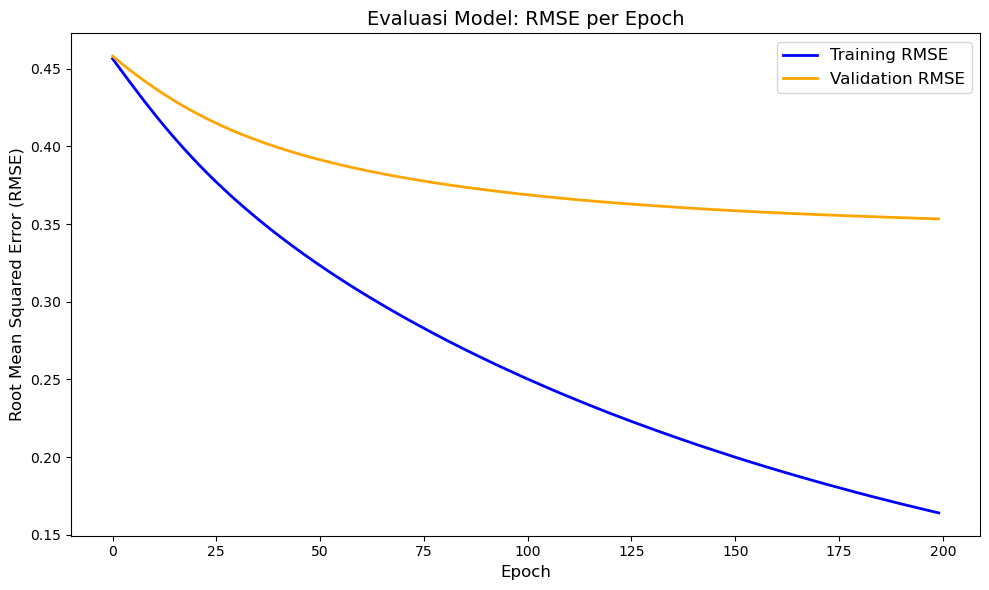

In [377]:
plt.figure(figsize=(10, 6))
plt.plot(history.history["root_mean_squared_error"], label="Training RMSE", color='blue', linewidth=2)
plt.plot(history.history["val_root_mean_squared_error"], label="Validation RMSE", color='orange', linewidth=2)

plt.title("Evaluasi Model: RMSE per Epoch", fontsize=14)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xlabel("Epoch", fontsize=12)

plt.legend(loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()

## Get Recommendations

### Content Based Filtering

In [164]:
def rekomendasi_makanan(nama_makanan, similarity_data=cos_sim_df, items=content_based_df, k = 10):
    """
    Memberikan rekomendasi makanan berdasarkan kesamaan nama makanan, dengan filtering tambahan.
    
    Args:
        nama_makanan (str): Nama makanan yang ingin dicari.
        similarity_data (pd.DataFrame): Matriks cosine similarity.
        items (pd.DataFrame): Data makanan asli.
        k (int): Jumlah rekomendasi yang diinginkan.
    
    Returns:
        pd.DataFrame: DataFrame berisi rekomendasi makanan.
    """
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy Range(start, stop, step)
    index = similarity_data.loc[:, nama_makanan].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1 : -(k + 2) : -1].flatten()]

    # Drop nama makanan target
    closest = closest.drop(nama_makanan, errors = "ignore")

    # Gabungkan dengan DataFrame asli untuk mengambil detail makanan
    recommendations = pd.DataFrame(closest, columns=["name"]).merge(items, on="name")

    # Ambil data makanan target
    target_item = items[items['name'] == nama_makanan].iloc[0]
    
    # Tambahkan kolom perbedaan kriteria
    recommendations['calories_gap'] = recommendations['calories'] - target_item['calories']
    
    # Urutkan berdasarkan selisih kriteria (prioritas: calories, minutes, n_steps)
    recommendations = recommendations.sort_values(
        by=['calories_gap'], 
        ascending=False
    )

    return recommendations.head(k)

In [165]:
# Menampilkan makanan yang pernah dipilih
content_based_df[content_based_df['name'] == "meatloaf with potato topping"]

,id,name,ingredients,calories,minutes,steps
2291,178424,meatloaf with potato topping,'vegetable oil' 'green onions' 'garlic cloves'...,414.6,105,"['in nonstick skillet , heat oil over medium h..."


In [166]:
# Menampilkan rekomendasi makanan berdasarkan makanan yang pernah dipilih
rekomendasi_makanan("meatloaf with potato topping")

,name,id,ingredients,calories,minutes,steps,calories_gap
3,beef tortilla cake,370187,'green onions' 'garlic cloves' 'olive oil' 'le...,803.0,80,"['preheat oven to 350f in a saucepan , brown t...",388.4
5,swedish meatballs ii,503197,'butter' 'onion' 'dried breadcrumbs' 'evaporat...,743.1,45,['melt 3 tablespoons butter or margarine in a ...,328.5
8,gabby gourmets southwestern chili,174503,'vegetable oil' 'lean ground beef' 'onions' 'g...,539.0,100,"['in a large heavy pot , heat the oil over med...",124.4
2,lemon and basil baked chicken,63005,'butter' 'garlic' 'dijon mustard' 'dry breadcr...,444.0,50,"['preheat oven to 375 degrees f', 'line baking...",29.4
6,orzo and vegetable salad,435590,'orzo' 'cider vinegar' 'vegetable oil' 'dijon ...,342.8,25,"['cook orzo according to package directions', ...",-71.8
7,ground beef teriyaki,36573,'vegetable oil' 'green onions' 'celery' 'carro...,307.9,45,"['in skillet over medium heat , in hot oil , c...",-106.7
0,bounty harvest meatloaf,41666,'lean ground beef' 'ground veal' 'carrots' 'on...,287.2,105,"['preheat oven to 350 degrees f', 'in large bo...",-127.4
1,herbed lentils and rice,265545,'vegetable broth' 'lentils' 'onion' 'brown ric...,262.2,95,['combine all ingredients except the cheese st...,-152.4
4,happy happy choy choy,92518,'green cabbage' 'bok choy' 'green onion' 'whit...,138.4,90,"['thoroughly combine shredded cabbage , shredd...",-276.2
9,low cal veggie soup,310422,'carrot' 'diced onion' 'minced garlic cloves' ...,49.2,25,['spray large saucepan with non-stick cooking ...,-365.4


### Collaborative Filtering

In [ ]:
food_df = 

## Evaluation

### Content Based Filtering

### Collaborative Filtering

## Conclusion

1. The model is regression model because it aims to predict a continuous outcome (Nutrition Density Values) based on various input features (nutrient values). The prediction is estimating nutrient density values, which inherently involves predicting numerical quantities.

2. All data have skewed distribution and outliers, whereas the neural network model is more suitable for normally distributed data. Hence, the data needs to be transformed to logarithmic values and then normalized. By pre-processing the data this way, we can enhance the model's ability to learn meaningful patterns, leading to better performance and generalization on unseen data.

3. Based on the model evaluation, the architecture design and training scheme (as splitting data into 90% `data_train`, 5% `data_validation`, and 5% `data_test`) of Model 1 is better than Model 2. This is drawn from comparing metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared values between the two models. The choice of architecture such as the number of layers and nodes, loss functions, and optimization techniques used in Model 1, likely contributed to its performance. In addition, there are recommendations to develop a model with superior performance as follows:

    * Further refinement of feature selection may enhance model performance. Identifying key features that significantly impact nutrition density could lead to improved predictive accuracy.
    * Explore different architectures and hyperparameter settings then identify the optimal configuration for the model.
    * Implementing regularization techniques such as dropout, L1/L2 regularization, or batch normalization can help prevent overfitting in complex models.

## References

1. Damar Upahita. 2021. *Panduan Mencukupi Kebutuhan Gizi Harian Untuk Anak Usia Sekolah (6 - 9 Tahun).* https://hellosehat.com/parenting/anak-6-sampai-9-tahun/gizi-anak/kebutuhan-asupan-gizi-anak/?amp=1. 

2. Dewi, dkk. 2021. *Pentingnya Pemenuhan Gizi Terhadap Kecerdasan Anak*. SENAPADMA:Seminar Nasional Pendidikan Dasar dan Menengah, Vol.1, pp. 16-21. Sukabumi: Universitas Nusa Putra.

1. KA, Mutirasari. 2024. *Program Makan Bergizi Gratis: Jadwal Berlaku, Sasaran hingga Aturan Pembagian.* Diakses pada 6 Desember 2024, dari https://news.detik.com/berita/d-7617806/program-makan-bergizi-gratis-jadwal-berlaku-sasaran-hingga-aturan-pembagian.

2. Kementerian Koordinator Bidang Pembangunan Manusia dan Kebudayaan Republik Indonesia. 2024. *Program Makan Bergizi Gratis untuk Tingkatkan Kualitas SDM Indonesia.* Diakses pada 6 Desember 2024, dari https://www.kemenkopmk.go.id/program-makan-bergizi-gratis-untuk-tingkatkan-kualitas-sdm-indonesia.

3. Kementerian Kesehatan Republik Indonesia. 2019. *Peraturan Menteri Kesehatan Republik Indonesia Nomor 28 Tahun 2019 Tentang Angka Kecukupan Gizi Yang Dianjurkan Untuk Masyarakat Indonesia.*